In [1]:
import disruptive as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import griddata, Rbf
import numpy as np
import pandas as pd

In [2]:

project_id='c1qprqlh2t8g02sfoq30'
dt.default_auth = dt.Auth.service_account('C73lmqav1410008ofpvg', 'a97dd7320f7845b7b6c7e2499f9e03c9','c73llpqv1410008ofpug@c1qprqlh2t8g02sfoq30.serviceaccount.d21s.com')

# #CloudConnector=blvjthsc0001nr3n4nt0


sensor = dt.Device.get_device('bjmghou7kro000cp4gng')


device_ids=['bjihp8m7kro000cp1tug','bu6oa4uptglg00ehc5b0','bjmd4i5p0jt000a5cldg','bu6onheptglg00ehcfag','bjihev8pismg008hrkig',
'bv8t0aqvje9g00eg5ma0','bjqhdclntbig00f92te0','bjqheb5ntbig00f92tng', 'bu6oqm988ueg00albpbg','bu6o15p88ueg00alb6c0', 'bjihd467gpvg00cjpb1g',
'btmsltc9kjug00dlsibg','bjiier0pismg008hru40', 'btmu2i5pna500081fju0','bjijkbe7kro000cp2feg','btou87tpna500081gi20',
'bv8stgs2ven000ch8k2g','bjihanlntbig00e44lc0','bu6nh7h88ueg00alaq2g','bjej76u7gpvg00cjoe20', 'bjejt50pismg008hqtf0',
'bjekggtp0jt000aqcsug','bjihmfe7kro000cp1t5g','bjii1qlntbig00e44s50','bjii8c7bluqg00dlv2gg','bjm1ft7bluqg00dlvrng',
'bjm2u6opismg008ht2a0','bjmgat7bluqg00dm1dt0','bjmgdle7gpvg00cjrvqg','bjmghou7kro000cp4gng','bjqhan67kro000cp7ojg',
'bjqhc85p0jt000a5gkg0','bt3nmnj853cg00fllacg']
sensorList=[]

for devices in device_ids: 
    sensor = dt.Device.get_device(devices) 
    if sensor.display_name!=None:
        sensorList.append(sensor.display_name)
print(sensorList)

['1OutdoorEntrance', '2OfficeDesk', '2Fireplace', '2BalconyEntrance', '2Cooking', '2LivingRoomCenter', '2LivingRoomHumidifier', '2LivingRoomCenterHumidity', '2LRWindow', '2Stair', '1Entrance1', '1Entrance2', '1GuestRoom', '0BRoom', '1MainRoom', '1MainBRHum', '1Stair bottom', '0BTFloor', '0BTCeiling', '0BathroomWater', 'KitchenSinkWater', '2FirePlaceDoor', '2OfficeDoor', '0BGuestDoor', '1MainDoor', '0BDoor', '1BathRoomWatet']


In [3]:
temperature_data = {}
for device in device_ids:
    # Fetch temperature events for the last 5 days.
    event_history = dt.EventHistory.list_events(
        device_id=device,
        project_id=project_id,
        event_types=[dt.events.TEMPERATURE],
        start_time=datetime.today() - timedelta(days=1),
    )
    # Isolate timeaxis and temperature data which can be plotted directly.
    sensor_name = dt.Device.get_device(device).display_name
    timestamps = [event.data.timestamp for event in event_history]
    temperature = [event.data.celsius for event in event_history]
    # Store the timestamps and temperature data in a dictionary.

    temperature_data[sensor_name] = {'timestamps': timestamps, 'temperature': temperature}

In [8]:
# Initiate an event stream for all devices in the sensor's project.
for event in dt.Stream.event_stream(sensor.project_id):
    # Check if the event is a temperature event for the specified device.
    if event.event_type == dt.events.TEMPERATURE and event.device_id == 'bjmd4i5p0jt000a5cldg':
        # Extract the temperature data from the event.
        temperature = event.data.celsius

        # Print the temperature to the console.
        print(f'Temperature: {temperature} °C')


In [ ]:

for device in device_ids:
    
# GF
temperature_data["0BRoom"]['coords']=[1.58,3]
temperature_data["0BTFloor"]['coords']=[8.4,2.5]
temperature_data["0BTCeiling"]['coords']=[8.4,2.3]

temperature_data["0BRoom"]['room']=['Soverom']
temperature_data["0BTFloor"]['room']=['Ungdomsavdeling']
temperature_data["0BTCeiling"]['room']=['Ungdomsavdeling']

#FF
temperature_data["1Entrance1"]['coords']=[3.6,8.1]
temperature_data["1Stair bottom"]['coords']=[3,5]
temperature_data["1Entrance2"]['coords']=[3,3]
temperature_data["1GuestRoom"]['coords']=[0,2]
temperature_data["1MainRoom"]['coords']=[8.4,2]

temperature_data["1Entrance1"]['room']=['Entre']
temperature_data["1Stair bottom"]['room']=['Entre']
temperature_data["1Entrance2"]['room']=['Entre']
temperature_data["1GuestRoom"]['room']=['Guestroom']
temperature_data["1MainRoom"]['room']=['MainRoom']

#SF
temperature_data["2OfficeDesk"]['coords']=[1,7]
temperature_data["2Stair"]['coords']=[3,5.7]
temperature_data["2LivingRoomCenter"]['coords']=[8.4,4]
temperature_data["2LRWindow"]['coords']=[4.5,0]
temperature_data["2Cooking"]['coords']=[0,1.6]
temperature_data["2Fireplace"]['coords']=[4.5,3.5]
temperature_data["2BalconyEntrance"]['coords']=[4.5,8.1]

temperature_data["2OfficeDesk"]['room']=['kontor']
temperature_data["2Stair"]['room']=['stue']
temperature_data["2LivingRoomCenter"]['room']=['stue']
temperature_data["2LRWindow"]['room']=['stue']
temperature_data["2Cooking"]['room']=['stue']
temperature_data["2Fireplace"]['room']=['stue']
temperature_data["2BalconyEntrance"]['room']=['stue']


In [ ]:
sensor_room=[]
for i in range(len(sensorList)):
    sensor_room.append(temperature_data[sensorList[i]]['room'])


print(sensor_room)

[['room'], ['kontor'], ['stue'], ['stue'], ['stue'], ['stue'], ['room'], ['room'], ['stue'], ['stue'], ['Entre'], ['Entre'], ['Guestroom'], ['Soverom'], ['MainRoom'], ['room'], ['Entre'], ['Ungdomsavdeling'], ['Ungdomsavdeling'], ['room'], ['room'], ['room'], ['room'], ['room'], ['room'], ['room'], ['room']]


In [ ]:
sensor_temps_GF = np.array([temperature_data["0BRoom"]['temperature'][-1:],
temperature_data["0BTCeiling"]['temperature'][-1:],
temperature_data["0BTFloor"]['temperature'][-1:]])

sensor_temps_FF = np.array([temperature_data["1Entrance1"]['temperature'][-1:],
temperature_data["1Stair bottom"]['temperature'][-1:],
temperature_data["1GuestRoom"]['temperature'][-1:],
temperature_data["1MainRoom"]['temperature'][-1:]])


sensor_temps_SF=np.array([temperature_data["2OfficeDesk"]['temperature'][-1:],
temperature_data["2Stair"]['temperature'][-1:],
temperature_data["2LivingRoomCenter"]['temperature'][-1:],
temperature_data["2LRWindow"]['temperature'][-1:],
temperature_data["2Cooking"]['temperature'][-1:],
temperature_data["2Fireplace"]['temperature'][-1:]])
# Define known points and temperatures


coords_GF=np.array([temperature_data["0BRoom"]['coords'],
temperature_data["0BTFloor"]['coords'],
temperature_data["0BTCeiling"]['coords']])
points=coords_GF

coords_FF=np.array([temperature_data["1Entrance1"]['coords'],
temperature_data["1Stair bottom"]['coords'],
temperature_data["1GuestRoom"]['coords'],
temperature_data["1MainRoom"]['coords']])

sensor_temps_SF=np.array([temperature_data["2OfficeDesk"]['coords'],
temperature_data["2Stair"]['coords'],
temperature_data["2LivingRoomCenter"]['coords'],
temperature_data["2LRWindow"]['coords'],
temperature_data["2Cooking"]['coords'],
temperature_data["2Fireplace"]['coords']])


In [ ]:
#GF
SoveromGF=(0,0),(3.15,0),(3.15,3),(0,3)
BodGF=(0,5.48),(4.29,5.48),(4.29,8.1),(0,8.1)
Bad=(4.29,5.48),(8.4,5.48),(8.4,8.1),(4.29,8.1)
Ungdomsavdeling=(3.15,0),(8.4,0),(8.4,5.48),(3.15,5.48)
TrapGF=(0,3),(3.15,3),(3,15,5.48),(0,5.48)



#FF
GuestRoom=(0,0),(3.6,0),(3.6,3),(0,3)
MainRoom=(3.6,0),(8.4,0),(8.4,3),(3.6,3)
SoveromFF=(6,3),(8.4,3),(8.4,8.1),(6,8.1)
BadFF=(0,5.8),(3.15,5.8),(3.15,8.1),(0,8.1)
Trap_Entre_Entrance=(0,3),(6.3,3),(6.3,5.48),(0,5.48),(3.15,8.1),(6,8.1)

#FF=GuestRoom,MainRoom,SoveromFF,BodFF,Trap_Entre_Entrance


In [ ]:
# Define the room coordinates
room_coords = {'SoveromGF': SoveromGF,
               'Bod': BodGF,
               'Bad': Bad,
               'Ungdomsavdeling':Ungdomsavdeling,
               'TrapGF':TrapGF,
               'GuestRoom':GuestRoom,
               'MainRoom':MainRoom,
               'SoveromFF':SoveromFF,
               'BadFF':BadFF,
               'Trap_Entre_Entrance':Trap_Entre_Entrance
}

In [ ]:

# Define grid points for interpolation
xgrid_tot, ygrid_tot = np.meshgrid(np.linspace(0, 8.42, 10), np.linspace(0, 8.12, 10))
grid_tot = np.column_stack((xgrid_tot.ravel(), ygrid_tot.ravel()))

# Define temperature data for four rooms and two hallways
#coord=coord_sensors


df_temp = {
    'x': [coords_GF[:,:1],coords_FF[:,:1]],
    'y': [coords_GF[:,1:]],
    'temperature': [sensor_temps_GF,sensor_temps_FF],
    'sensor':[sensor_name],
    'room': ['room1', 'room1', 'room1', 'room2', 'room2', 'room3'],
}

# Define door sensor data for three doors
df_doors = {
    'x':[3, 3],
    'y':[10, 20],
    'door1': ['room1', 'room2'],
    'door2': ['room2', 'room3'],
    'is_open': [False, True]
}



In [ ]:
v=0
w=0
for room in df_temp['room']:
    if room=='room1':
        w+=1 
        sensor_room1=v,w
    elif room=='room2':
        v=sensor_room1[1]
        w+=1
        sensor_room2=v,w
    elif room=='room3':
        v=sensor_room2[1]
        w+=1
        sensor_room3=v,w
sensor_room1_open2=sensor_room1[0],sensor_room2[1]
sensor_room2_open3=sensor_room2[0],sensor_room3[1]

In [ ]:
from scipy.interpolate import griddata

def interpolate_temp(xi,yi,room):
    

In [ ]:
room_grid={}
for room in room_coords:
    i=0
    i+=1
    temp=[]
    if len(room_coords[room])<5:
        a=min(room_coords[room])
        b=max(room_coords[room])

        xgrid,ygrid=np.meshgrid(np.linspace(a[0],b[0],2),np.linspace(a[1],b[1],2))
        grid=np.column_stack((xgrid.ravel(),ygrid.ravel()))
        room_grid[room]=grid
        

print(room_grid)

{'SoveromGF': array([[0.  , 0.  ],
       [3.15, 0.  ],
       [0.  , 3.  ],
       [3.15, 3.  ]]), 'Bod': array([[0.  , 5.48],
       [4.29, 5.48],
       [0.  , 8.1 ],
       [4.29, 8.1 ]]), 'Bad': array([[4.29, 5.48],
       [8.4 , 5.48],
       [4.29, 8.1 ],
       [8.4 , 8.1 ]]), 'Ungdomsavdeling': array([[1., 1.],
       [2., 1.],
       [1., 2.],
       [2., 2.]]), 'GuestRoom': array([[0. , 0. ],
       [3.6, 0. ],
       [0. , 3. ],
       [3.6, 3. ]]), 'MainRoom': array([[3.6, 0. ],
       [8.4, 0. ],
       [3.6, 3. ],
       [8.4, 3. ]]), 'SoveromFF': array([[6.3, 3. ],
       [8.4, 3. ],
       [6.3, 8.1],
       [8.4, 8.1]]), 'BodFF': array([[0. , 5.8],
       [2.3, 5.8],
       [0. , 8.1],
       [2.3, 8.1]])}


[[16.2 ]
 [22.35]
 [22.3 ]]


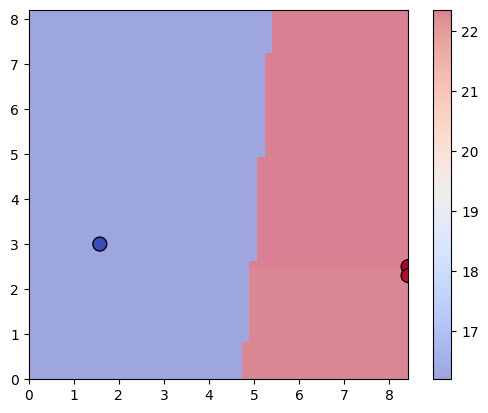

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.interpolate import griddata

sensor_temps = np.array([temperature_data["0BRoom"]['temperature'][-1:],
temperature_data["0BTCeiling"]['temperature'][-1:],
temperature_data["0BTFloor"]['temperature'][-1:]])

print(sensor_temps)
# Define known points and temperatures


coords=np.array([temperature_data["0BRoom"]['coords'],
temperature_data["0BTFloor"]['coords'],
temperature_data["0BTCeiling"]['coords']])
points=coords

# Define grid points for interpolation
xgrid, ygrid = np.meshgrid(np.linspace(0, 8.42, 50), np.linspace(0, 8.12, 50))
grid_points = np.column_stack((xgrid.ravel(), ygrid.ravel()))

# Interpolate temperatures at grid points using IDW
interp_temperatures = griddata(points, sensor_temps, grid_points, method='nearest')

# Reshape interpolated temperatures into a grid
interp_temperatures_grid = interp_temperatures.reshape(xgrid.shape)

# Plot the heat map with known points and interpolated temperatures
plt.figure(1)
plt.scatter(points[:, 0], points[:, 1], c=sensor_temps, cmap='coolwarm', s=100, edgecolor='black')
plt.imshow(interp_temperatures_grid, cmap='coolwarm', origin='lower', extent=(0, 8.42, 0, 8.2), alpha=0.5)
plt.colorbar()
plt.show()
plt.savefig("./img/"+"heatmap")

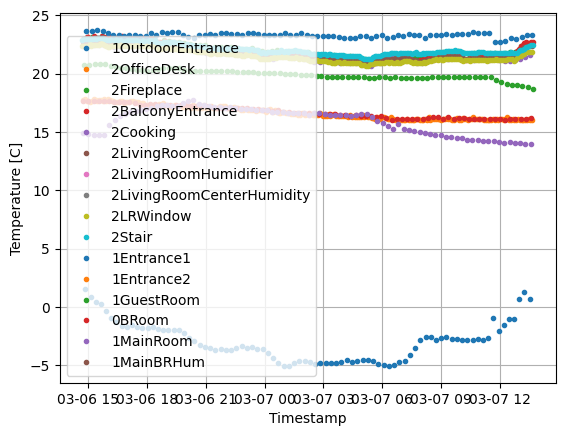

In [ ]:

plt.figure(1)
for devices in device_ids: 
    # Generate a plot using the fetched timeaxis and temperature values.    
    sensor_name = dt.Device.get_device(devices).display_name 
    plt.plot(temperature_data[sensor_name]['timestamps'], temperature_data[sensor_name]['temperature'], '.',label=sensor_name) 
    plt.legend()
plt.grid()
plt.xlabel('Timestamp')
plt.ylabel('Temperature [C]')
plt.show()



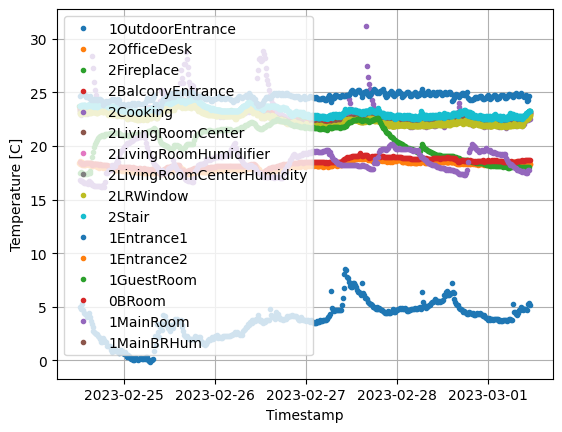

In [ ]:

plt.figure(1)
for devices in device_ids: 
    # Fetch temperature events for the last 2 days.    
    event_history = dt.EventHistory.list_events( 
    device_id=devices, project_id=project_id, 
    event_types=[dt.events.TEMPERATURE], 
    start_time=datetime.today()-timedelta(days=5),) 
    # Isolate timeaxis and temperature data which can be plotted directly.    
    timestamps = [event.data.timestamp for event in event_history]
    temperature = [event.data.celsius for event in event_history]
    # Generate a plot using the fetched timeaxis and temperature values.    
    sensor_name = dt.Device.get_device(devices).display_name 
    plt.plot(timestamps, temperature, '.',label=sensor_name) 
    plt.legend()
plt.grid()
plt.xlabel('Timestamp')
plt.ylabel('Temperature [C]')
plt.show()

